In [1]:
import act
import glob
import matplotlib.pyplot as plt
import matplotlib

In [12]:
files2 = glob.glob('cmscl*')

In [27]:
ds = act.io.read_arm_netcdf(files2)

In [28]:
ds

<xarray.Dataset> Size: 201MB
Dimensions:                            (time: 3060, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 24kB 2023-05-18T...
  * range                              (range) float64 26kB 0.0 ... 1.572e+04
  * layer                              (layer) float64 40B 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 8B -87.72
    latitude                           float64 8B 41.98
Data variables: (12/26)
    cloud_base_heights                 (time, layer) float64 122kB dask.array<chunksize=(1, 5), meta=np.ndarray>
    vertical_visibility                (time) float64 24kB dask.array<chunksize=(5,), meta=np.ndarray>
    p_pol                              (time, range) float32 40MB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    x_pol                              (time, range) float32 40MB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    beta_att                           (time, range) float32 40MB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    linear_depol_ratio                 (time, range) float32 40MB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    ...                                 ...
    fog_detection                      (time) float32 12kB dask.array<chunksize=(5,), meta=np.ndarray>
    receiver_gain                      (time) float32 12kB dask.array<chunksize=(5,), meta=np.ndarray>
    range_resolution                   (time) float32 12kB 4.8 4.8 ... 4.8 4.8
    cloud_calibration_factor           (time) float64 24kB 0.4334 ... 0.4334
    cloud_calibration_factor_user      (time) float64 24kB 0.4334 ... 0.4334
    overlap_function                   (time, range) float32 40MB dask.array<chunksize=(5, 3276), meta=np.ndarray>
Attributes: (12/18)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF-1.8
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    file_temporal_span_in_minutes:  5.0
    profile_interval_in_seconds:    60
    _file_dates:                    ['20230518', '20230518', '20230518', '202...
    _file_times:                    ['164525', '164525', '164525', '164525', ...
    _datastream:                    act_datastream
    _arm_standards_flag:            0

In [29]:
ds.attrs['datastream'] = 'celiometer.b1'

In [30]:
variables=['p_pol', 'x_pol', 'linear_depol_ratio']

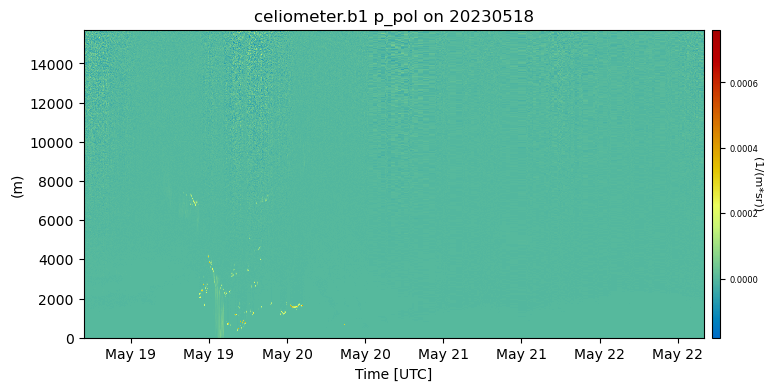

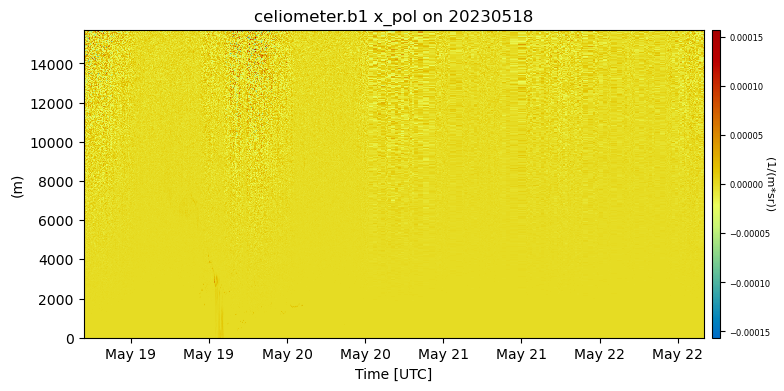

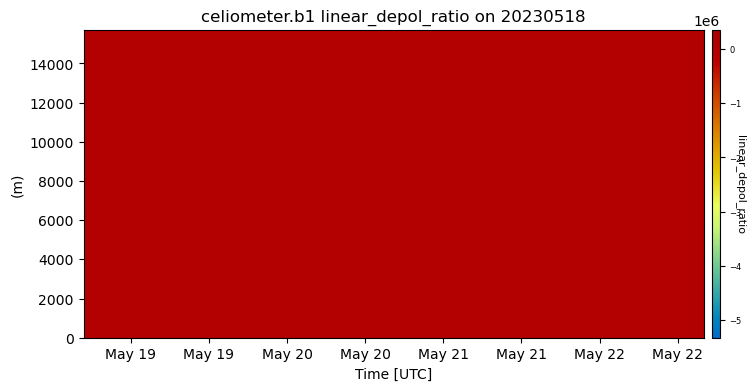

In [31]:
for variable in variables:
    display = act.plotting.TimeSeriesDisplay(ds, figsize=(8,4))
    if variable == 'backscatter':
        display.plot(variable,
                     cmap='Gray5',
                     vmin=0,
                     vmax=8,
                     y_rng=(0, ds.range.max().values))
    else:
        display.plot(variable,
                     cmap='HomeyerRainbow',
                     y_rng=(0, ds.range.max().values))
    plt.show()
    plt.close()